In [136]:
from bs4 import BeautifulSoup
#import urllib.request
import requests
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get("https://timesofindia.indiatimes.com/business/india-business/whatsapp-fixes-bug-that-installed-spyware-via-voice-calling-urges-users-to-upgrade-app/articleshow/69325927.cms", headers=headers)

soup = BeautifulSoup(response.text)
#print(soup.prettify())
spans = []
brs=[]        

spans = soup.findAll('div',{"class":"article_content clearfix"})
#print(spans,len(spans))
span=str(spans[0]).replace("<br/>","").replace("</div>","").replace("</div>","").replace('<div class="article_content clearfix"><arttextxml><div class="section1"><div class="Normal">NEW DELHI: <a class="key_underline" href="https://timesofindia.indiatimes.com/topic/whatsapp">',"")
span=span.replace('</a>','').replace('<div class="top2brdiv">',"").replace('<div class="last8brdiv">',"").replace('<div class="last7brdiv">',"")
span=span.replace('<div class="last5brdiv">','').replace('<div class="last6brdiv">',"").replace('<div class="last4brdiv">','')
span=span.replace('<div class="last3brdiv">',"").replace('<div class="last2brdiv">','').replace('<div class="last1brdiv">','')
span=span.replace('</arttextxml><div style="clear:both; margin-top: 15px">Download The Times of India <a href="http://get.timesofindia.com" target="_blank"><strong>News App</strong> for Latest <a href="http://get.timesofindia.com" target="_blank"><strong>Business News</strong>.<div class="gn-affiliate-box grid-list version2 ATFPos hide js-india-only"><div class="photogallery34">','')
span=span.replace("\n","")
#.replace('<div class="top2brdiv">',"").replace('<div class="last8brdiv"> ',"").replace('<div class="last7brdiv">',"")
#print(span)
TimesOfIndia_text=span
#print(TimesOfIndia_text)

In [137]:
from bs4 import BeautifulSoup
#import urllib.request
import requests
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get("https://www.thehindubusinessline.com/info-tech/social-media/whatsapp-urges-users-to-update-after-spyware-hacking/article27125342.ece", headers=headers)

soup = BeautifulSoup(response.text)
#print(soup.prettify())
spans = []
spans = soup.findAll('div',{"id":"content-body-22285694-27125342"})
#print("****************************************************************************\n",spans,len(spans))
#print(spans[0])
span=str(spans[0]).replace('<div id="content-body-22285694-27125342">','').replace('<p>','').replace('</p>','').replace('</div>','')
#print(span)
TheHindu_text=span
#print(TheHindu_text)

In [138]:
# Analysis (code)

def lexical_diversity(text):
    tokens=text.lower().split()
    return len(set(tokens))/len(tokens)
# Times of India Diversities

toi_diversities=[]
toi_diversities.append(lexical_diversity(TimesOfIndia_text))
#print(toi_diversities)


# The Hindu Diversities

thehindu_diversities=[]
thehindu_diversities.append(lexical_diversity(TheHindu_text))
#print(thehindu_diversities)

In [139]:
def get_tokens(text):
    tokens=text.lower().split()
    return set(tokens)

# Times of India tokens

toi_tokens=[]
toi_tokens.append(get_tokens(TimesOfIndia_text))
#print(toi_tokens)


# The Hindu tokens

thehindu_tokens=[]
thehindu_tokens.append(get_tokens(TheHindu_text))
#print(thehindu_tokens)



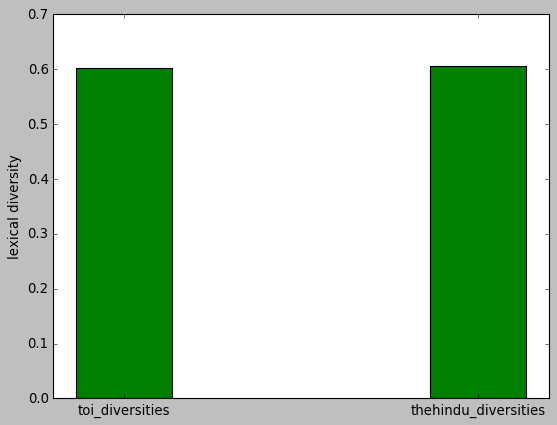

In [115]:
 import numpy as np
import matplotlib.pyplot as plt

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [toi_diversities[0],thehindu_diversities[0]]
rects1 = ax.bar(ind, yvals, width, color='g')


ax.set_ylabel('lexical diversity')
ax.set_xticks(ind)
ax.set_xticklabels( ('toi_diversities', 'thehindu_diversities') )
# ax.legend( (rects1[0]), ('y') )

# def autolabel(rects):
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
#                 ha='center', va='bottom')

# autolabel(rects1)
plt.show()

171


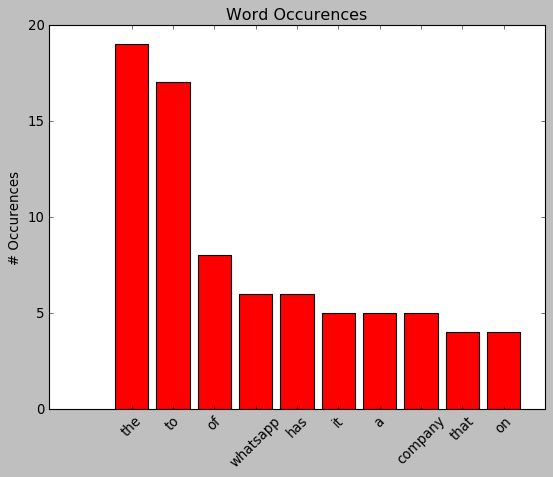

In [140]:
from collections import Counter
mat=TimesOfIndia_text
words=mat.lower().split()
word_counts=Counter(words)
print(len(word_counts))
#print(word_counts)

import matplotlib.pyplot as plt
NUM_Values=10
heights=list(word_counts.values())
heights.sort(reverse=True)
#plt.bar(range(len(heights)),heights)
plt.bar(range(NUM_Values),heights[:NUM_Values],color='red')
#print(heights)
plt.title("Word Occurences")
plt.ylabel('# Occurences')
#plt.xlabel('')
keys=list(word_counts.keys())
keys.sort(reverse=True,key=lambda x: word_counts[x])
#print(keys)
#plt.xticks(range(len(heights)),keys)
plt.xticks(range(NUM_Values),keys[:NUM_Values],rotation=45)
import matplotlib.style as style
style.use('seaborn-poster')
style.use('classic')
style.use('seaborn-talk')
plt.show()


202


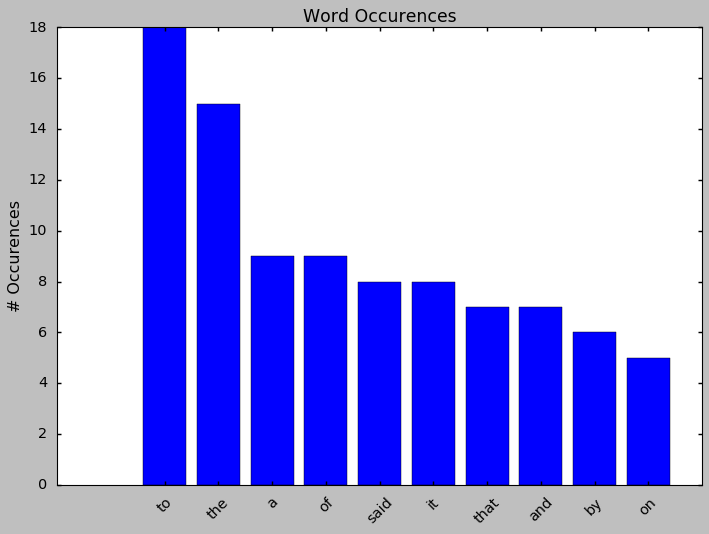

In [141]:
from collections import Counter
mat=TheHindu_text
words=mat.lower().split()
word_counts=Counter(words)
#print(word_counts)
print(len(word_counts))
import matplotlib.pyplot as plt
NUM_Values=10
heights=list(word_counts.values())
heights.sort(reverse=True)
#plt.bar(range(len(heights)),heights)
plt.bar(range(NUM_Values),heights[:NUM_Values])
#print(heights)
plt.title("Word Occurences")
plt.ylabel('# Occurences')
#plt.xlabel('')
keys=list(word_counts.keys())
keys.sort(reverse=True,key=lambda x: word_counts[x])
#print(keys)
#plt.xticks(range(len(heights)),keys)
plt.xticks(range(NUM_Values),keys[:NUM_Values],rotation=45)
import matplotlib.style as style
style.use('seaborn-poster')
style.use('classic')
style.use('seaborn-talk')
plt.show()


In [142]:
import pickle
from nltk_helpers import get_sentiments
toi_sentiments=(get_sentiments(TimesOfIndia_text))
#print(toi_sentiments)
hindu_sentiments=(get_sentiments(TheHindu_text))
#print(hindu_sentiments)


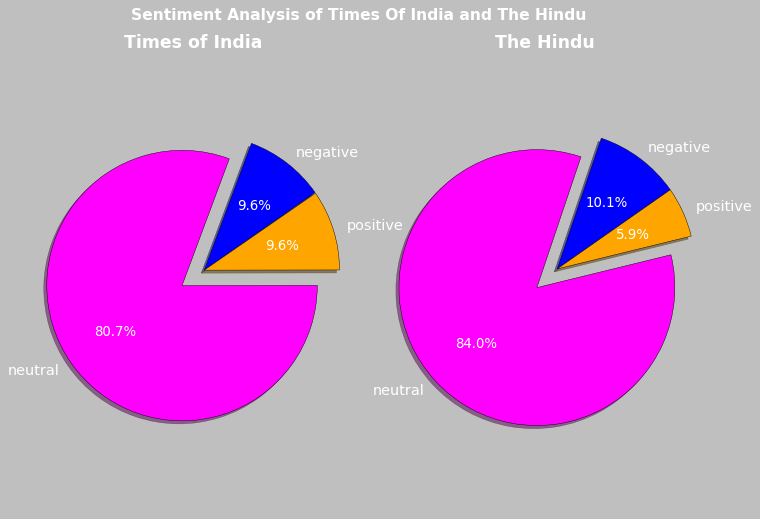

In [143]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'negative', 'neutral', 'positive'
sizes1 = [toi_sentiments['neg'],toi_sentiments['neu'],toi_sentiments['pos']]
sizes2=  [hindu_sentiments['neg'],hindu_sentiments['neu'],hindu_sentiments['pos']]
colors=['blue','magenta','orange']
explode = (0, 0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(sizes1, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True,startangle=35,textprops={'color':"w"})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.pie(sizes2, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True,startangle=35,textprops={'color':"w"})
ax2.axis('equal') 
plt.suptitle('Sentiment Analysis of Times Of India and The Hindu', fontsize=14, fontweight='bold',color='white')
#plt.legend(loc='best',shadow=True)
import matplotlib.style as style
#style.use('seaborn-poster')
style.use('classic')
ax1.title.set_text('Times of India')
ax2.title.set_text('The Hindu')
ax1.title.set_color('white')
ax2.title.set_color('white')
ax1.title.set_fontweight('bold')
ax2.title.set_fontweight('bold')
#style.use('seaborn-talk')
#style.use('dark_background')
#style.use('fivethirtyeight')
plt.savefig('myplot1.png',transparent='True')
plt.show()

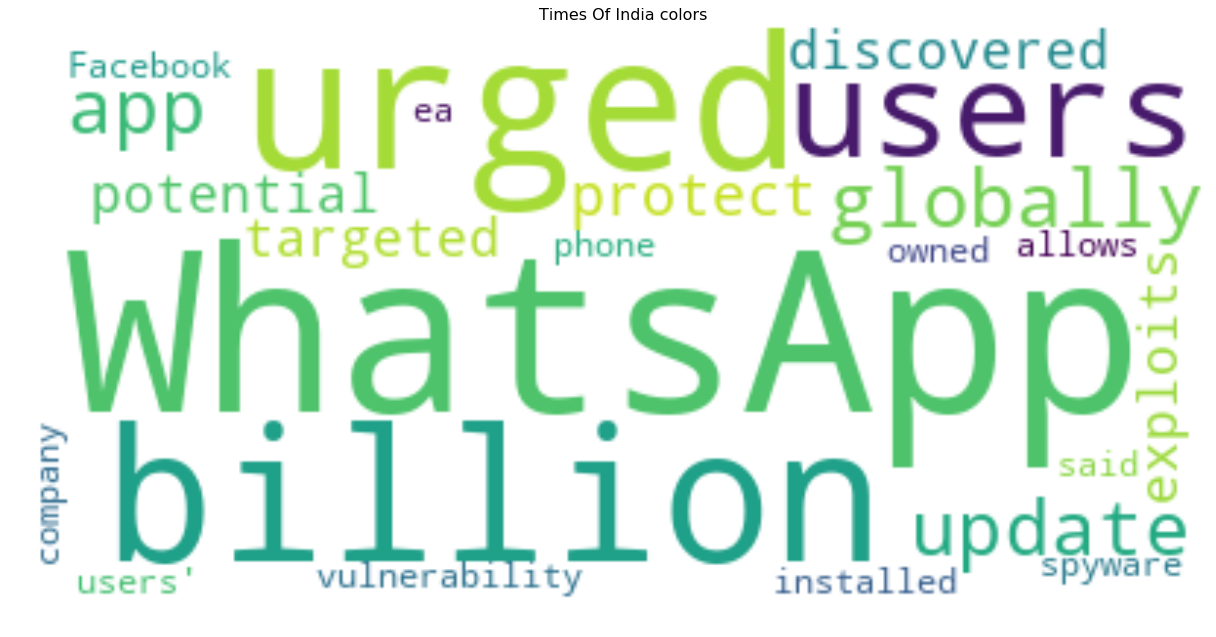

In [146]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import random
import matplotlib.pyplot as plt

words = TimesOfIndia_text[:250]
#mask = np.array(Image.open('C:\\Users\\S534662\\Desktop\\WebMining\\whatsapp.png'))
# This function takes in your text and your mask and generates a wordcloud. 
#word_cloud = WordCloud(background_color='black', stopwords=STOPWORDS, mask=mask).generate(words)
#plt.figure(figsize=(15,15),facecolor = 'white', edgecolor='blue')
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def generate_wordcloud(words):
    word_cloud = WordCloud(background_color='white',stopwords=STOPWORDS).generate(words)
    default_colors = word_cloud.to_array()
    plt.figure(figsize=(15,15),facecolor = 'white')
    plt.imshow(word_cloud.recolor(color_func=grey_color_func, random_state=2),
           interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    plt.title("Times Of India colors")
    plt.imshow(default_colors, interpolation="bilinear")
    plt.savefig('toi1.png',transparent='True')
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words)

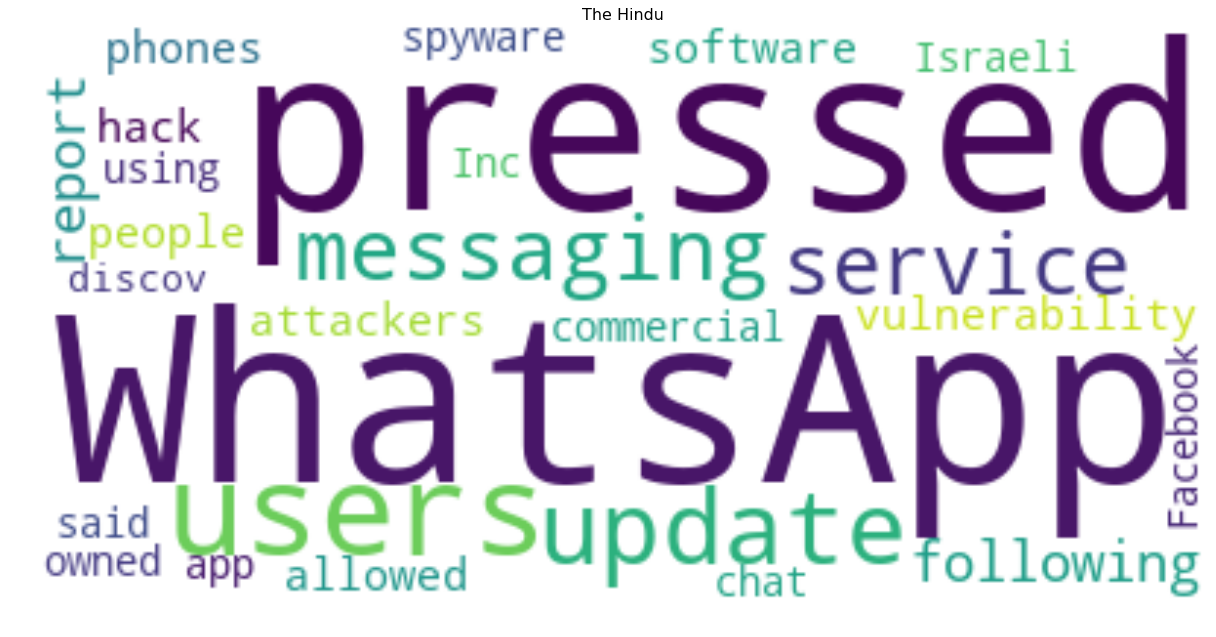

In [145]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import random
import matplotlib.pyplot as plt

words = TheHindu_text[:250]
#mask = np.array(Image.open('C:\\Users\\S534662\\Desktop\\WebMining\\whatsapp.png'))
# This function takes in your text and your mask and generates a wordcloud. 
#word_cloud = WordCloud(background_color='black', stopwords=STOPWORDS, mask=mask).generate(words)
#plt.figure(figsize=(15,15),facecolor = 'white', edgecolor='blue')
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def generate_wordcloud(words):
    word_cloud = WordCloud(background_color='white',stopwords=STOPWORDS).generate(words)
    default_colors = word_cloud.to_array()
    plt.figure(figsize=(15,15),facecolor = 'white')
    plt.imshow(word_cloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title("The Hindu")
    plt.imshow(default_colors, interpolation="bilinear")
    plt.savefig('hindu1.png',transparent='True')
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words)